### 6 - Regressão Linear Polinomial
#### Por Adriano Santos



In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Importando os dados
df = pd.read_csv('dados/ex_rp.csv')
# Verificando os dados
df

,Cargo,Nivel,Salario
0,Programador,1,45000
1,Desenvolvedor Web,2,50000
2,Arquiteto,3,60000
3,Gerente,4,80000
4,Coordenador,5,110000
5,Coordenador Senior,6,150000
6,Coordenador Regional,7,200000
7,Gerente de Tecnologia,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# Preparando os dados
X = df.iloc[:, 1:2].values
y = df.iloc[:, -1].values

In [4]:
y


array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [5]:
# Criando e treinando o modelo linear
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Salário')

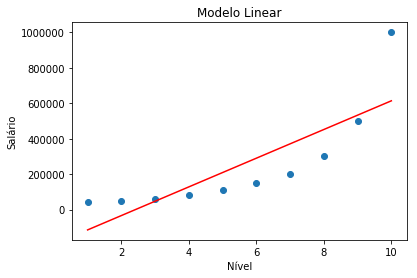

In [6]:
# Apresentando os dados
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color='red')
plt.title ('Modelo Linear')
plt.xlabel('Nível')
plt.ylabel('Salário')

## Regressão Polinomial

In [7]:
# Preparando o modelo polinomial
pf = PolynomialFeatures(degree=5)
X_pf = pf.fit_transform(X)
X_pf

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [8]:
# Criando o modelo linear polinomial
plr = LinearRegression()
plr.fit(X_pf, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

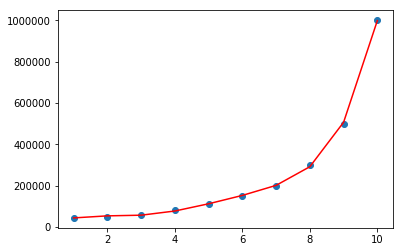

In [9]:
# Apresentando o comportamento polinomial
# Note que não utilizei o X_pf. Se subistituirmos teremos o mesmo resultado, no entanto, da forma que foi implementada,
# podemos criar uma função de plotagem de dados e o valor de X poderá ser reutilizado.
plt.scatter(X, y)
plt.plot(X, plr.predict(pf.fit_transform(X)), color='red')

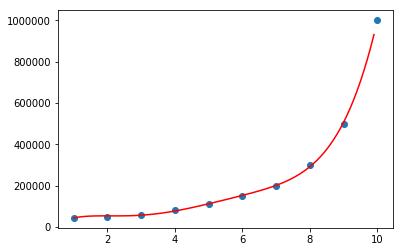

In [10]:
# Procedimento para plotar a linha de forma mais suave.
x_grid = np.arange(min(X), max(X), 0.1)
x_grid = x_grid.reshape((len(x_grid)), 1)
# Plotando os resultados.
plt.scatter(X, y)
plt.plot(x_grid, plr.predict(pf.fit_transform(x_grid)), color='red')